YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.2098 - val_loss: 0.0034
Epoch 2/80
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0120 - val_loss: 0.0034
Epoch 3/80
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 4/80
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0066 - val_loss: 0.0026
Epoch 5/80
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0047 - val_loss: 0.0022
Epoch 6/80
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046 - val_loss: 0.0027
Epoch 7/80
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0069 - val_loss: 0.0023
Epoch 8/80
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - val_loss: 0.0025
Epoch 9/80
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0046 - val_loss: 0.0030
Epoch 10/80
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0044 - val_loss: 0.0024
Epoch 11/80
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0094 - val_loss: 0.0031
Epoch 12/80
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/s

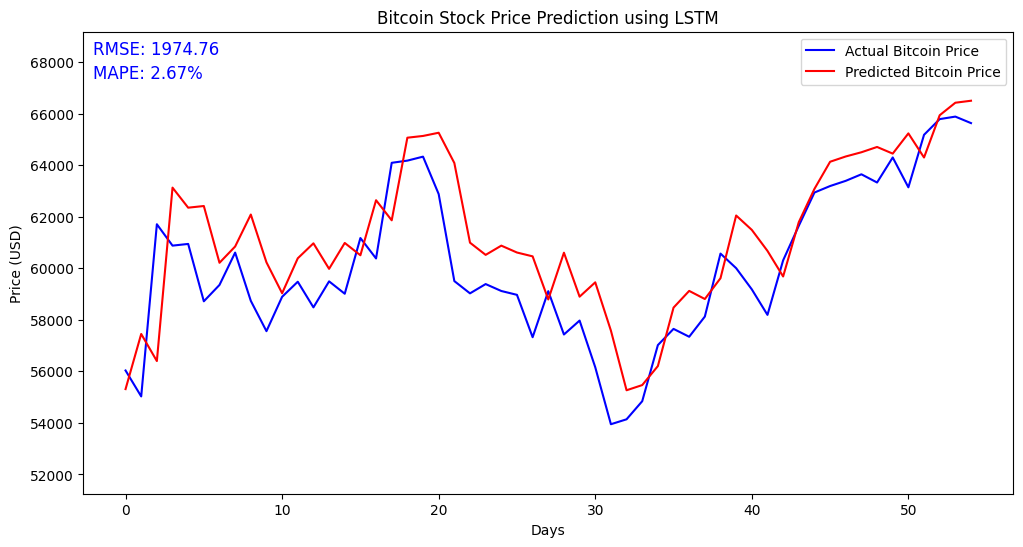

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Bitcoin Price for Next Day: $64450.97
Mean Absolute Percentage Error (MAPE): 2.67%
Root Mean Squared Error (RMSE): 1974.76
Model Accuracy: 97.33%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

btc_data = yf.download('BTC-USD', start='2024-01-01', end='2024-10-01')
btc_data = btc_data[['Close']]


scaler = MinMaxScaler(feature_range=(0,1))
btc_scaled = scaler.fit_transform(btc_data)


def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 1
X, y = create_sequences(btc_scaled, time_step)


X = X.reshape(X.shape[0], X.shape[1], 1)


split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=80, batch_size=2, validation_data=(X_test, y_test), verbose=1)


y_pred = model.predict(X_test)


y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))


mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
accuracy = 100 - mape




plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual Bitcoin Price", color='blue')
plt.plot(y_pred_inv, label="Predicted Bitcoin Price", color='red')
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.ylim(min(y_test_inv) * 0.95, max(y_test_inv) * 1.05)


plt.text(0.01, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.01, 0.90, f'MAPE: {mape:.2f}%', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.legend()
plt.title("Bitcoin Stock Price Prediction using LSTM")
plt.show()

last_60_days = btc_scaled[-time_step:]
last_60_days = last_60_days.reshape(1, time_step, 1)
next_day_prediction = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_prediction.reshape(-1, 1))

print(f"Predicted Bitcoin Price for Next Day: ${next_day_price[0][0]:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.3505 - val_loss: 0.0043
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0613 - val_loss: 0.0697
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0316 - val_loss: 0.0118
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0238 - val_loss: 0.0220
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0131 - val_loss: 0.0335
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0122 - val_loss: 0.0159
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0123 - val_loss: 0.0217
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0100 - val_loss: 0.0152
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0084 - val_loss: 0.0118
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0090 - val_loss: 0.0121
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0081 - val_loss: 0.0072
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 13/50

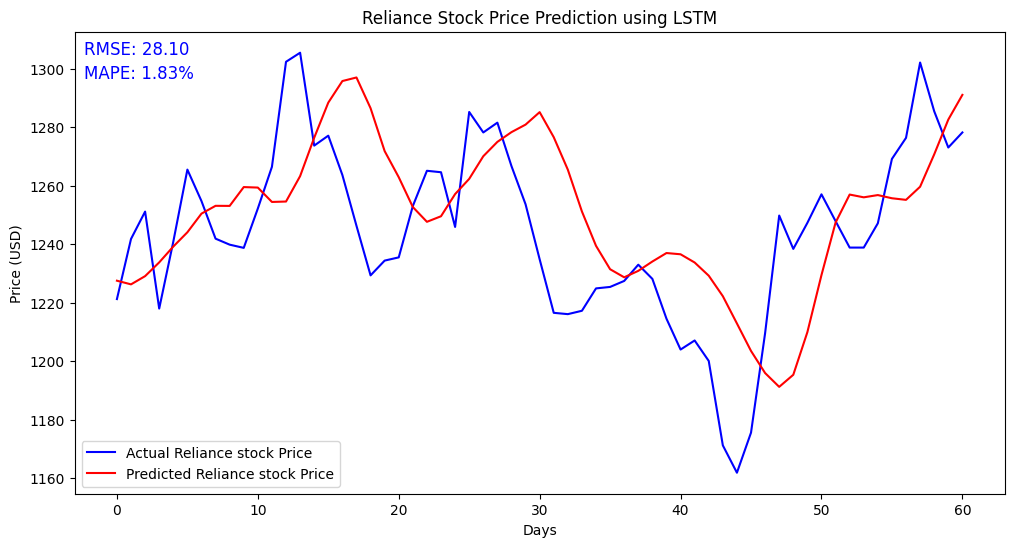

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Reliace stock Price for Next Day: $1293.35
Mean Absolute Percentage Error (MAPE): 1.83%
Root Mean Squared Error (RMSE): 28.10
Model Accuracy: 98.17%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# 1. Download reliance stock price data from Yahoo Finance
reliance_data = yf.download("RELIANCE.NS", start="2024-01-01", end="2025-04-01", interval="1d")
reliance_data = reliance_data[['Close']]  # Use only closing prices

# 2. Data Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
reliance_scaled = scaler.fit_transform(reliance_data)

# Create sequences for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_sequences(reliance_scaled, time_step)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# 3. Build LSTM Model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 5. Evaluate and Predict
y_pred = model.predict(X_test)

# Convert back to original scale
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute Accuracy Metrics
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100  # MAPE in percentage
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
accuracy = 100 - mape  # Approximate accuracy

# 6. Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual Reliance stock Price", color='blue')
plt.plot(y_pred_inv, label="Predicted Reliance stock Price", color='red')
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.ylim(50, max(y_test_inv) * 1.05)  # Set a minimum of 300 for better visualization

# Annotate metrics on the graph
plt.text(0.01, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.01, 0.90, f'MAPE: {mape:.2f}%', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.legend()
plt.title("Reliance Stock Price Prediction using LSTM")
plt.show()

# 7. Predict Next Day reliance stock Price
last_60_days = reliance_scaled[-time_step:]  # Take last 60 days data
last_60_days = last_60_days.reshape(1, time_step, 1)  # Reshape for model

next_day_prediction = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_prediction.reshape(-1, 1))

print(f"Predicted Reliace stock Price for Next Day: ${next_day_price[0][0]:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.2523 - val_loss: 0.0159
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0316 - val_loss: 0.0245
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0147 - val_loss: 0.0159
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0170 - val_loss: 0.0258
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0149 - val_loss: 0.0157
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0130 - val_loss: 0.0125
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0097 - val_loss: 0.0164
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0111 - val_loss: 0.0114
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0100 - val_loss: 0.0110
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - val_loss: 0.0102
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0103 - val_loss: 0.0094
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0090 - val_loss: 0.0092
Epoch 13/50

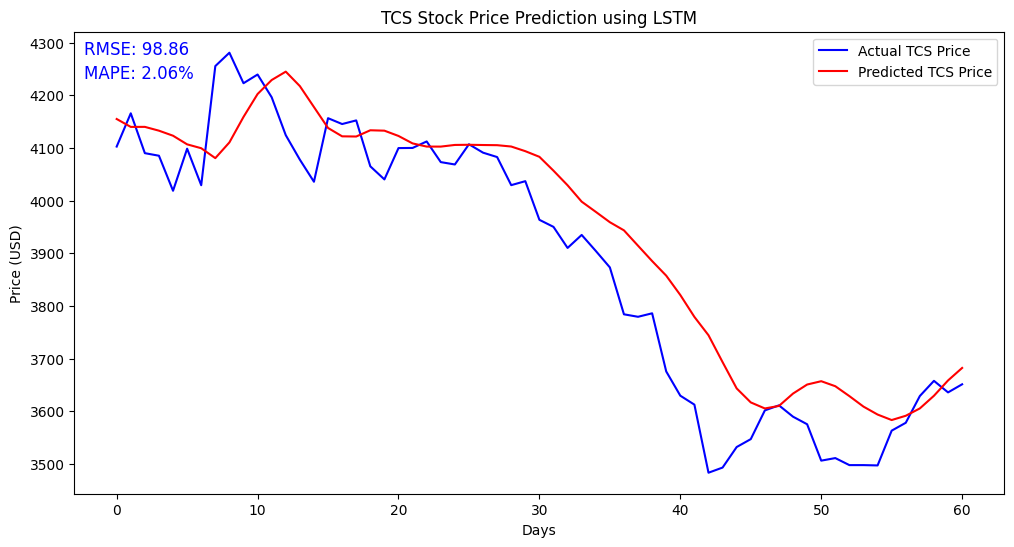

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Predicted TCS stock Price for Next Day: $3699.36
Mean Absolute Percentage Error (MAPE): 2.06%
Root Mean Squared Error (RMSE): 98.86
Model Accuracy: 97.94%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

data = yf.download( "TCS.NS", start="2024-01-01", end="2025-04-01")
data = data[['Close']]

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_sequences(data_scaled, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_pred = model.predict(X_test)

y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
accuracy = 100 - mape

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual TCS Price", color='blue')
plt.plot(y_pred_inv, label="Predicted TCS Price", color='red')
plt.xlabel("Days")
plt.ylabel("Price (USD)")
# plt.ylim(100, max(y_test_inv) * 1.05)  # Set a minimum of 300 for better visualization

plt.text(0.01, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.01, 0.90, f'MAPE: {mape:.2f}%', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.legend()
plt.title("TCS Stock Price Prediction using LSTM")
plt.show()

last_60_days = data_scaled[-time_step:]
last_60_days = last_60_days.reshape(1, time_step, 1)

next_day_prediction = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_prediction.reshape(-1, 1))

print(f"Predicted TCS stock Price for Next Day: ${next_day_price[0][0]:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.2249 - val_loss: 0.0770
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0442 - val_loss: 0.0180
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0255 - val_loss: 0.0307
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0219 - val_loss: 0.0045
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0109 - val_loss: 0.0044
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0097 - val_loss: 0.0097
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0082 - val_loss: 0.0056
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0072 - val_loss: 0.0064
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0082 - val_loss: 0.0046
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0077 - val_loss: 0.0049
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0078 - val_loss: 0.0047
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - val_loss: 0.0045
Epoch 13/50


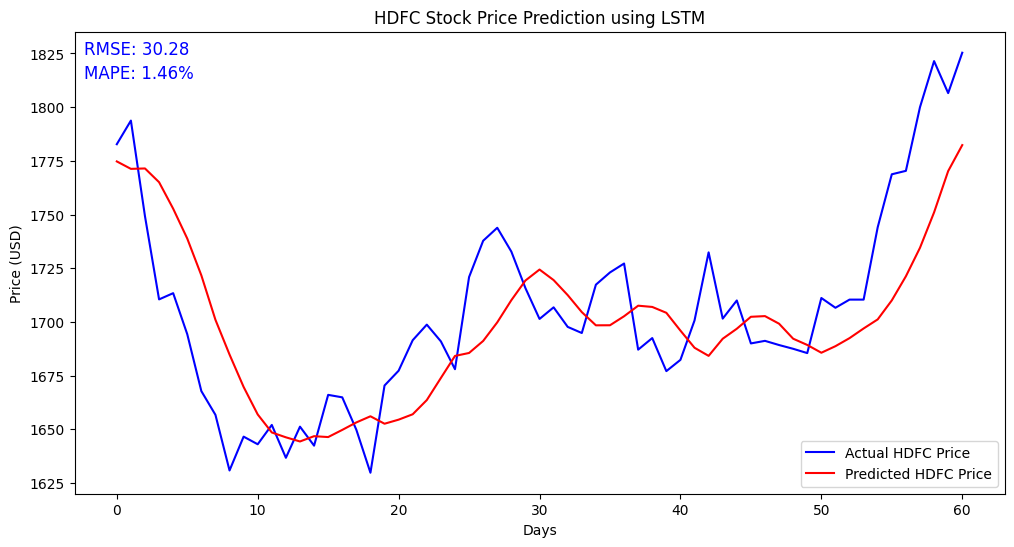

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted HDFC stock Price for Next Day: $1801.46
Mean Absolute Percentage Error (MAPE): 1.46%
Root Mean Squared Error (RMSE): 30.28
Model Accuracy: 98.54%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

data = yf.download("HDFCBANK.NS", start="2024-01-01", end="2025-04-01")
data = data[['Close']]

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_sequences(data_scaled, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_pred = model.predict(X_test)

y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
accuracy = 100 - mape

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual HDFC Price", color='blue')
plt.plot(y_pred_inv, label="Predicted HDFC Price", color='red')
plt.xlabel("Days")
plt.ylabel("Price (USD)")

plt.text(0.01, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.01, 0.90, f'MAPE: {mape:.2f}%', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.legend()
plt.title("HDFC Stock Price Prediction using LSTM")
plt.show()

last_60_days = data_scaled[-time_step:]
last_60_days = last_60_days.reshape(1, time_step, 1)

next_day_prediction = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_prediction.reshape(-1, 1))

print(f"Predicted HDFC stock Price for Next Day: ${next_day_price[0][0]:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.3199 - val_loss: 0.1284
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0556 - val_loss: 0.0539
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0281 - val_loss: 0.0233
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0229 - val_loss: 0.0074
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0099 - val_loss: 0.0073
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0087 - val_loss: 0.0082
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0082 - val_loss: 0.0059
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0064 - val_loss: 0.0052
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0071 - val_loss: 0.0061
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - val_loss: 0.0058


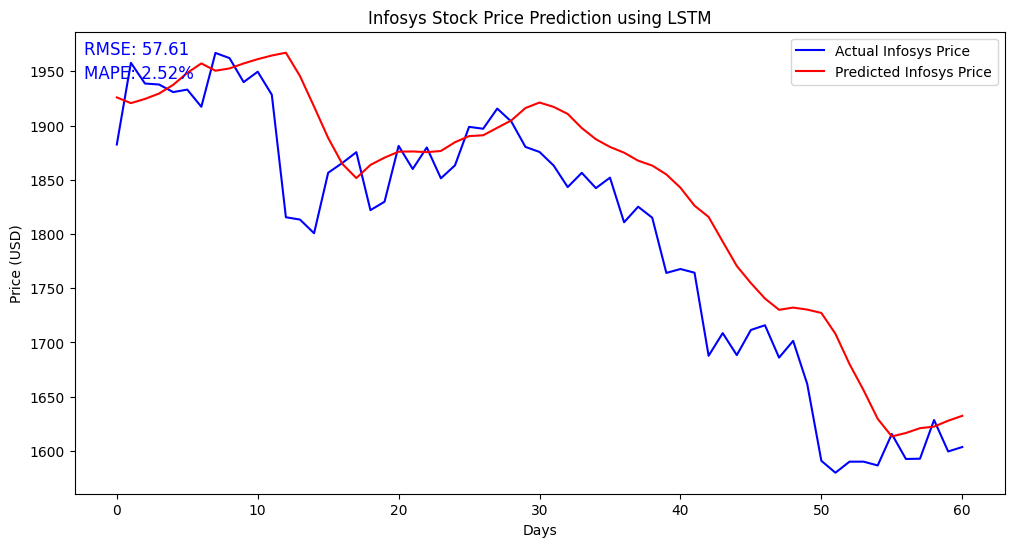

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Infosys stock Price for Next Day: $1628.62
Mean Absolute Percentage Error (MAPE): 2.52%
Root Mean Squared Error (RMSE): 57.61
Model Accuracy: 97.48%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

data = yf.download("INFY.NS", start="2024-01-01", end="2025-04-01")
data = data[['Close']]

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_sequences(data_scaled, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_pred = model.predict(X_test)

y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
accuracy = 100 - mape

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual Infosys Price", color='blue')
plt.plot(y_pred_inv, label="Predicted Infosys Price", color='red')
plt.xlabel("Days")
plt.ylabel("Price (USD)")

plt.text(0.01, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.01, 0.90, f'MAPE: {mape:.2f}%', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.legend()
plt.title("Infosys Stock Price Prediction using LSTM")
plt.show()

last_60_days = data_scaled[-time_step:]
last_60_days = last_60_days.reshape(1, time_step, 1)

next_day_prediction = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_prediction.reshape(-1, 1))

print(f"Predicted Infosys stock Price for Next Day: ${next_day_price[0][0]:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.1826 - val_loss: 0.0061
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0268 - val_loss: 0.0306
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0162 - val_loss: 0.0061
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0149 - val_loss: 0.0136
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0102 - val_loss: 0.0054
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0076 - val_loss: 0.0038
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0057 - val_loss: 0.0035
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0052 - val_loss: 0.0032
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0052 - val_loss: 0.0032
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0047 - val_loss: 0.0032
Epoch 13/50

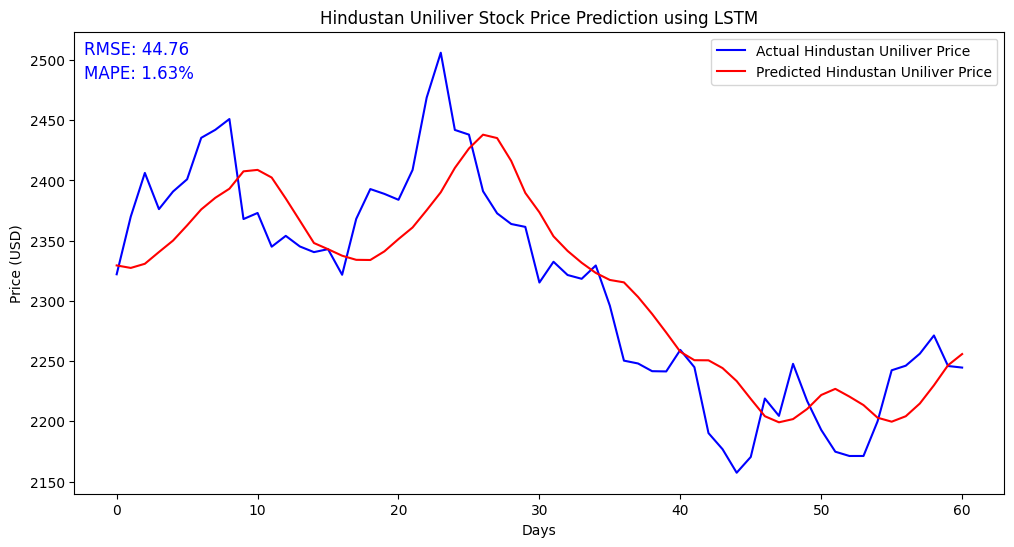

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Hindustan Uniliver stock Price for Next Day: $2257.50
Mean Absolute Percentage Error (MAPE): 1.63%
Root Mean Squared Error (RMSE): 44.76
Model Accuracy: 98.37%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

data = yf.download("HINDUNILVR.NS", start="2024-01-01", end="2025-04-01")
data = data[['Close']]

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_sequences(data_scaled, time_step)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# 3. Build LSTM Model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 5. Evaluate and Predict
y_pred = model.predict(X_test)

# Convert back to original scale
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute Accuracy Metrics
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100  # MAPE in percentage
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
accuracy = 100 - mape  # Approximate accuracy

# 6. Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual Hindustan Uniliver Price", color='blue')
plt.plot(y_pred_inv, label="Predicted Hindustan Uniliver Price", color='red')
plt.xlabel("Days")
plt.ylabel("Price (USD)")

plt.text(0.01, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.01, 0.90, f'MAPE: {mape:.2f}%', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.legend()
plt.title("Hindustan Uniliver Stock Price Prediction using LSTM")
plt.show()

last_60_days = data_scaled[-time_step:]
last_60_days = last_60_days.reshape(1, time_step, 1)

next_day_prediction = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_prediction.reshape(-1, 1))

print(f"Predicted Hindustan Uniliver stock Price for Next Day: ${next_day_price[0][0]:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.2543 - val_loss: 0.0113
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0457 - val_loss: 0.0546
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0207 - val_loss: 0.0089
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0228 - val_loss: 0.0174
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0101 - val_loss: 0.0130
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0065 - val_loss: 0.0080
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0062 - val_loss: 0.0107
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0052 - val_loss: 0.0081
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0053 - val_loss: 0.0085
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0060 - val_loss: 0.0080
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0056 - val_loss: 0.0096
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0076 - val_loss: 0.0078
Epoch 13/50

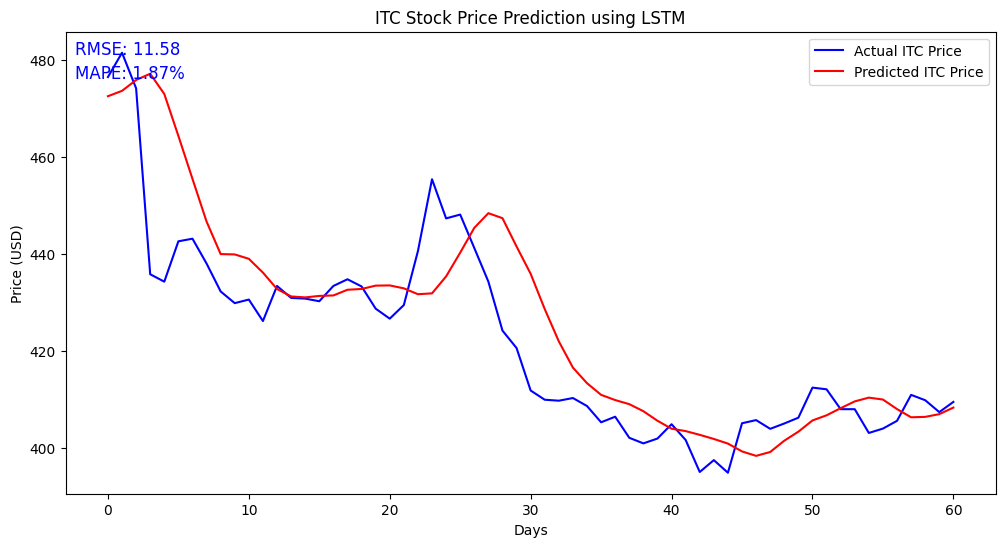

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted ITC stock Price for Next Day: $410.12
Mean Absolute Percentage Error (MAPE): 1.87%
Root Mean Squared Error (RMSE): 11.58
Model Accuracy: 98.13%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

data = yf.download("ITC.NS", start="2024-01-01", end="2025-04-01")
data = data[['Close']]

# 2. Data Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_sequences(data_scaled, time_step)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# 3. Build LSTM Model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 5. Evaluate and Predict
y_pred = model.predict(X_test)

# Convert back to original scale
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute Accuracy Metrics
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
accuracy = 100 - mape

# 6. Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual ITC Price", color='blue')
plt.plot(y_pred_inv, label="Predicted ITC Price", color='red')
plt.xlabel("Days")
plt.ylabel("Price (USD)")

plt.text(0.01, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.01, 0.90, f'MAPE: {mape:.2f}%', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.legend()
plt.title("ITC Stock Price Prediction using LSTM")
plt.show()

last_60_days = data_scaled[-time_step:]
last_60_days = last_60_days.reshape(1, time_step, 1)

next_day_prediction = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_prediction.reshape(-1, 1))

print(f"Predicted ITC stock Price for Next Day: ${next_day_price[0][0]:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0975 - val_loss: 0.0374
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0119 - val_loss: 0.0210
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0062 - val_loss: 0.0498
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0051 - val_loss: 0.0166
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0067 - val_loss: 0.0270
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0045 - val_loss: 0.0280
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0043 - val_loss: 0.0218
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0057 - val_loss: 0.0243
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0050 - val_loss: 0.0188
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0048 - val_loss: 0.0235
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0052 - val_loss: 0.0166
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0047 - val_loss: 0.0169
Epoch 13/50

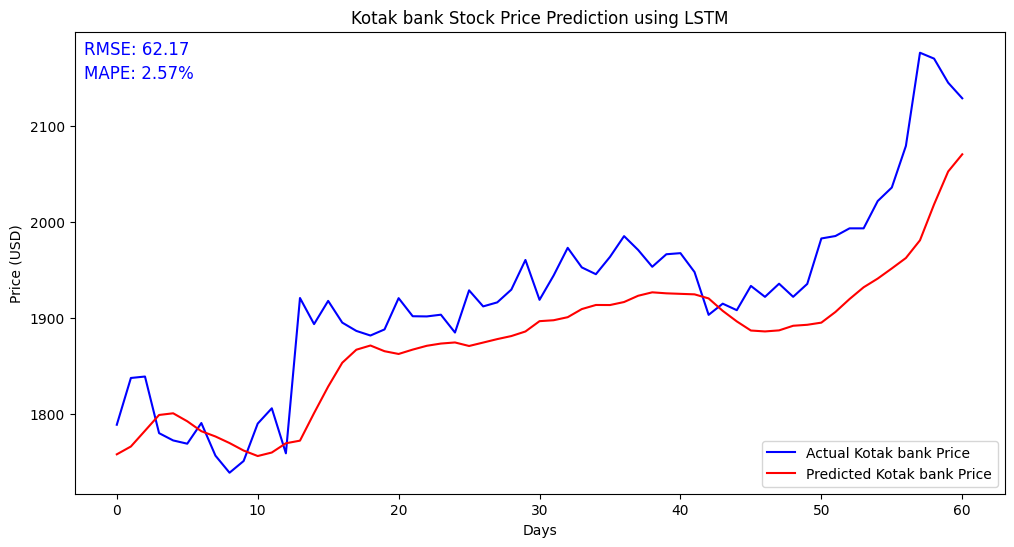

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Kotak bank stock Price for Next Day: $2078.36
Mean Absolute Percentage Error (MAPE): 2.57%
Root Mean Squared Error (RMSE): 62.17
Model Accuracy: 97.43%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

data = yf.download("KOTAKBANK.NS", start="2024-01-01", end="2025-04-01")
data = data[['Close']]

# 2. Data Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_sequences(data_scaled, time_step)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# 3. Build LSTM Model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 5. Evaluate and Predict
y_pred = model.predict(X_test)

# Convert back to original scale
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute Accuracy Metrics
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
accuracy = 100 - mape

# 6. Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual Kotak bank Price", color='blue')
plt.plot(y_pred_inv, label="Predicted Kotak bank Price", color='red')
plt.xlabel("Days")
plt.ylabel("Price (USD)")

plt.text(0.01, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.01, 0.90, f'MAPE: {mape:.2f}%', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.legend()
plt.title("Kotak bank Stock Price Prediction using LSTM")
plt.show()

last_60_days = data_scaled[-time_step:]
last_60_days = last_60_days.reshape(1, time_step, 1)

next_day_prediction = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_prediction.reshape(-1, 1))

print(f"Predicted Kotak bank stock Price for Next Day: ${next_day_price[0][0]:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 0.3824 - val_loss: 0.0430
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0534 - val_loss: 0.0589
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0317 - val_loss: 0.0041
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0228 - val_loss: 0.0037
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0097 - val_loss: 0.0152
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0117 - val_loss: 0.0033
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0098 - val_loss: 0.0066
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0093 - val_loss: 0.0048
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0081 - val_loss: 0.0036
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0070 - val_loss: 0.0053
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0071 - val_loss: 0.0035
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0067 - val_loss: 0.0037
Epoch 13/50

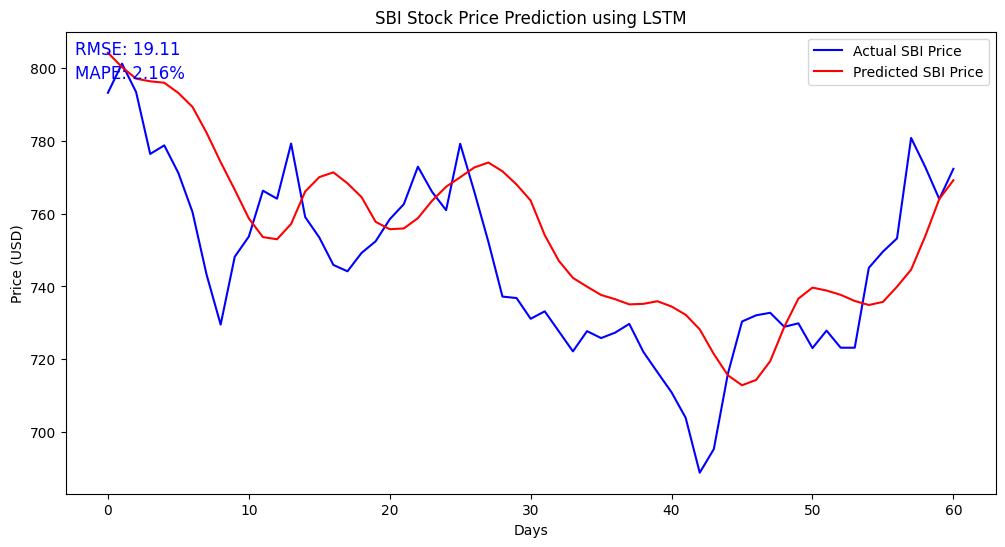

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted SBI stock Price for Next Day: $777.17
Mean Absolute Percentage Error (MAPE): 2.16%
Root Mean Squared Error (RMSE): 19.11
Model Accuracy: 97.84%


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

data = yf.download("SBIN.NS", start="2024-01-01", end="2025-04-01")
data = data[['Close']]

# 2. Data Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_sequences(data_scaled, time_step)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# 3. Build LSTM Model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 5. Evaluate and Predict
y_pred = model.predict(X_test)

# Convert back to original scale
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute Accuracy Metrics
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
accuracy = 100 - mape

# 6. Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual SBI Price", color='blue')
plt.plot(y_pred_inv, label="Predicted SBI Price", color='red')
plt.xlabel("Days")
plt.ylabel("Price (USD)")

plt.text(0.01, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.01, 0.90, f'MAPE: {mape:.2f}%', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.legend()
plt.title("SBI Stock Price Prediction using LSTM")
plt.show()

last_60_days = data_scaled[-time_step:]
last_60_days = last_60_days.reshape(1, time_step, 1)

next_day_prediction = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_prediction.reshape(-1, 1))

print(f"Predicted SBI stock Price for Next Day: ${next_day_price[0][0]:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0578 - val_loss: 0.1438
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0123 - val_loss: 0.0462
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0074 - val_loss: 0.1231
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0097 - val_loss: 0.0477
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0057 - val_loss: 0.0421
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0050 - val_loss: 0.0298
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0046 - val_loss: 0.0180
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042 - val_loss: 0.0117
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040 - val_loss: 0.0110
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0039 - val_loss: 0.0132
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0043 - val_loss: 0.0130
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0045 - val_loss: 0.0127
Epoch 13/50

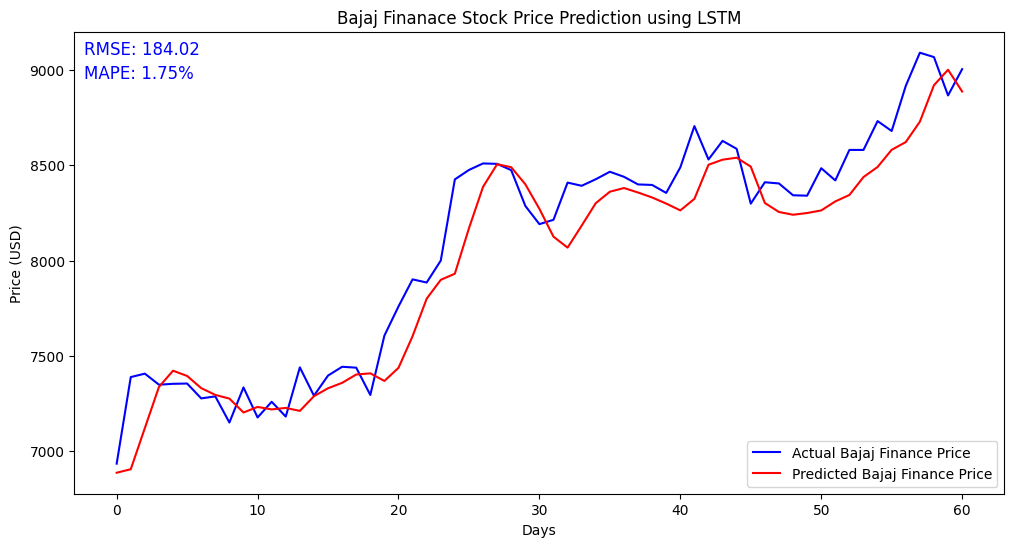

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Bajaj Finance stock Price for Next Day: $8773.91
Mean Absolute Percentage Error (MAPE): 1.75%
Root Mean Squared Error (RMSE): 184.02
Model Accuracy: 98.25%


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

data = yf.download("BAJFINANCE.NS", start="2024-01-01", end="2025-04-01")
data = data[['Close']]

# 2. Data Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_sequences(data_scaled, time_step)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# 3. Build LSTM Model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 5. Evaluate and Predict
y_pred = model.predict(X_test)

# Convert back to original scale
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute Accuracy Metrics
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
accuracy = 100 - mape

# 6. Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual Bajaj Finance Price", color='blue')
plt.plot(y_pred_inv, label="Predicted Bajaj Finance Price", color='red')
plt.xlabel("Days")
plt.ylabel("Price (USD)")

plt.text(0.01, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.01, 0.90, f'MAPE: {mape:.2f}%', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.legend()
plt.title("Bajaj Finanace Stock Price Prediction using LSTM")
plt.show()

last_60_days = data_scaled[-time_step:]
last_60_days = last_60_days.reshape(1, time_step, 1)

next_day_prediction = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_prediction.reshape(-1, 1))

print(f"Predicted Bajaj Finance stock Price for Next Day: ${next_day_price[0][0]:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.2566 - val_loss: 0.0064
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0362 - val_loss: 0.0518
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0218 - val_loss: 0.0093
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0204 - val_loss: 0.0224
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0112 - val_loss: 0.0238
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0096 - val_loss: 0.0136
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0073 - val_loss: 0.0145
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0086 - val_loss: 0.0118
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0075 - val_loss: 0.0099
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0068 - val_loss: 0.0084
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0085 - val_loss: 0.0075
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0070 - val_loss: 0.0058
Epoch 13/50

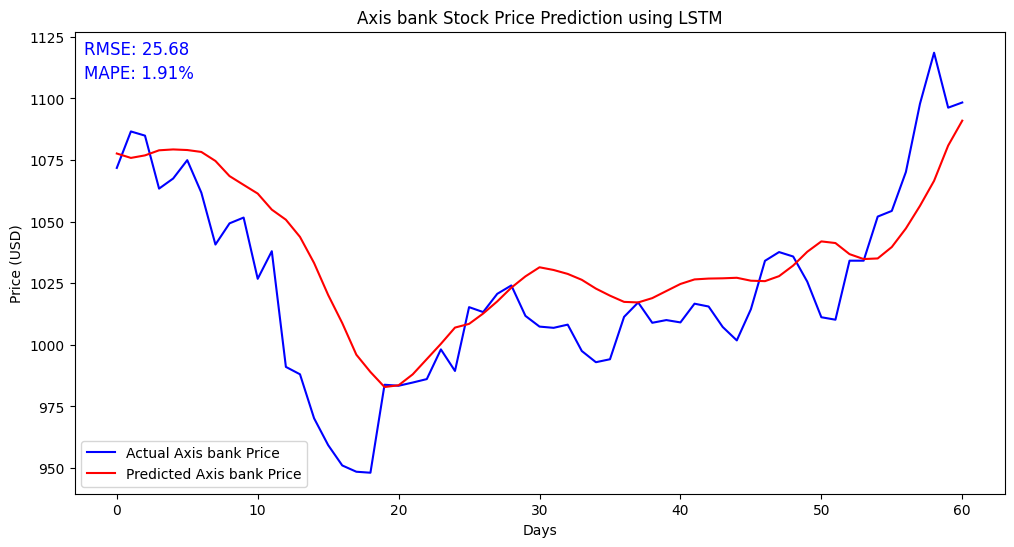

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Axis bank stock Price for Next Day: $1102.88
Mean Absolute Percentage Error (MAPE): 1.91%
Root Mean Squared Error (RMSE): 25.68
Model Accuracy: 98.09%


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

data = yf.download("AXISBANK.NS", start="2024-01-01", end="2025-04-01")
data = data[['Close']]

# 2. Data Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_sequences(data_scaled, time_step)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# 3. Build LSTM Model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 5. Evaluate and Predict
y_pred = model.predict(X_test)

# Convert back to original scale
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute Accuracy Metrics
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
accuracy = 100 - mape  # Approximate accuracy

# 6. Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual Axis bank Price", color='blue')
plt.plot(y_pred_inv, label="Predicted Axis bank Price", color='red')
plt.xlabel("Days")
plt.ylabel("Price (USD)")

plt.text(0.01, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.01, 0.90, f'MAPE: {mape:.2f}%', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.legend()
plt.title("Axis bank Stock Price Prediction using LSTM")
plt.show()

last_60_days = data_scaled[-time_step:]
last_60_days = last_60_days.reshape(1, time_step, 1)

next_day_prediction = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_prediction.reshape(-1, 1))

print(f"Predicted Axis bank stock Price for Next Day: ${next_day_price[0][0]:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")